In [1]:
import pickle
import matplotlib.pyplot as plt

from utils.preprocessing import *

### predict using the model

In [2]:
[features, scaled_features] = np.load('../processed_data/features_sim.npy', allow_pickle=True)
with open('../realtime_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

### place side-by-side to visualize pattern

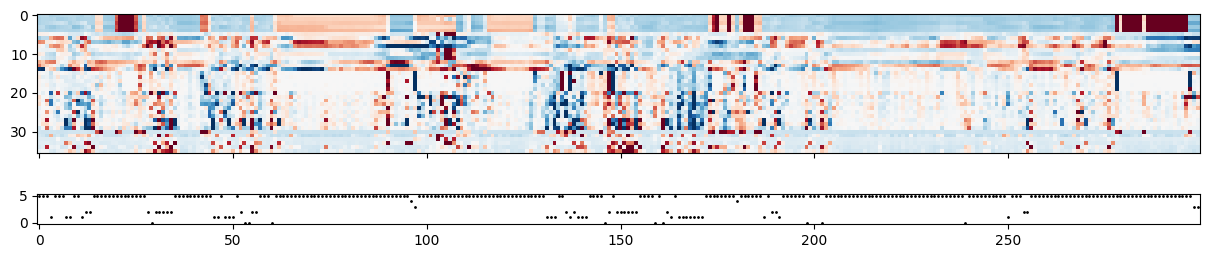

In [3]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, :300], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(300), predictions[:300], s=1, color='k')
plt.show()

In [14]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([0., 1., 2., 3., 4., 5.]), array([ 57,  43,  55,  19,   4, 131]))

### Save processed file

In [20]:
np.save('../processed_data/predict_sim.npy', predictions)